In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing required packages
import re
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
# reading the dataset and loading into a dataframe
df = pd.read_csv('../data/cyberbullying_tweets.csv')

# printing the shape: (rows, columns)
display(df.shape)

# first 5 datapoints
display(df.head())

# 5 random samples
display(df.sample(5))

(47692, 2)

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

tweet_text cyberbullying_type
23362  RT @sneekinsneekout: @Madasatrain69 @OZzSue @M...           religion
37112  all the girls that bullied me for wearing chun...                age
41200  DON’T!! it ain’t worth ur time sis i was force...          ethnicity
45428  White people lectured black people for YEARS s...          ethnicity
8278   “@guardian: Miley Cyrus makes date rape joke o...             gender

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


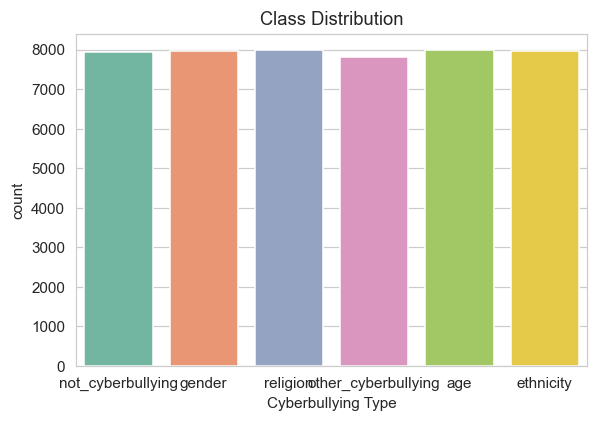

In [4]:
# class distribution
print(df['cyberbullying_type'].value_counts())

# plotting the class distribution
plt.figure(dpi=110)
chart = sns.countplot(x="cyberbullying_type", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Cyberbullying Type')
plt.show()

In [5]:
# counting null values in the dataset
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
# splitting into train-test sets (80-20)
# performing a random split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# rest index
df_train.reset_index()
df_test.reset_index()

# size of train vs test
print(df_train.shape, 'vs', df_test.shape)

# class distribution of train set
display(df_train['cyberbullying_type'].value_counts())

# class distribution of test set
display(df_test['cyberbullying_type'].value_counts())

df_test.to_csv('../data/test_data.csv', index=False)

(38153, 2) vs (9539, 2)


gender                 6442
religion               6432
age                    6389
ethnicity              6358
not_cyberbullying      6321
other_cyberbullying    6211
Name: cyberbullying_type, dtype: int64

not_cyberbullying      1624
other_cyberbullying    1612
ethnicity              1603
age                    1603
religion               1566
gender                 1531
Name: cyberbullying_type, dtype: int64

In [7]:
# spawning a word lemmatizer
lemma = WordNetLemmatizer()

# loading all the english stopwords
stop_words = stopwords.words('english')

# total stopwords
print(len(stop_words))

# first 10 stopwords
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [8]:
## defining the cleaning and preprocessing actions
# converting text to lowercase
# removing links
# coverting text into tokens
# removing stop words
# lemmatizing all words
# removing all words with length less than 3
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+',' ',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(w) for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [9]:
# cleaning and preprocessing the tweet_text column
df_train['clean_tweet'] = df['tweet_text'].apply(clean_text)

display(df_train.loc[:,['tweet_text', 'clean_tweet']].head())

tweet_text  \
27942  RT @avatastic: @freebsdgirl Also, anyone who h...   
13988  @Questionnier is dis a joke gay rape or babe rape   
30197  RT @DavidCleevely: Raspberry Pi Foundation loo...   
47342  STOLEN // reply and ill give you one = luv ur ...   
43358  People in Navarre are so fucking dumb there wa...   

                                             clean_tweet  
27942  avatastic freebsdgirl also anyone never writte...  
13988           questionnier dis joke gay rape babe rape  
30197  davidcleevely raspberry foundation looking new...  
47342  stolen reply ill give one luv pinned love seei...  
43358  people navarre fucking dumb never anything pos...

In [10]:
# clean training dataset
df_train_cleaned = df_train.loc[:,['clean_tweet', 'cyberbullying_type']]

# saving the cleaned training data
df_train_cleaned.to_csv('../data/train_data.csv', index=False)

display(df_train_cleaned.sample(10))

clean_tweet   cyberbullying_type
45811               shut three fuck dumb nigger dickhead            ethnicity
36208  yes never naturally gifted sport loathed compe...                  age
37632  regardless political siding much respect never...                  age
39681  see girl bullied high school exact shit would ...                  age
32400                      swear fault first fuckn place                  age
5802                 omg bsdtrhodes bsdcan going trouble    not_cyberbullying
32259  also agree asp weirdo pseudo steampunk lookin ...                  age
35187  mean girl high school mimi bullied chloe high ...                  age
42225  tayyoung fuck obama dumb nigger fuck bitch ugl...            ethnicity
25301                          pass entertainment around  other_cyberbullying

# To do:
1. Binary encode the class labels: cyberbullying_type
2. Convert clean_tweet to vector notations
3. Save as train.csv

## WordCloud: Not cyberbullying tweets
----

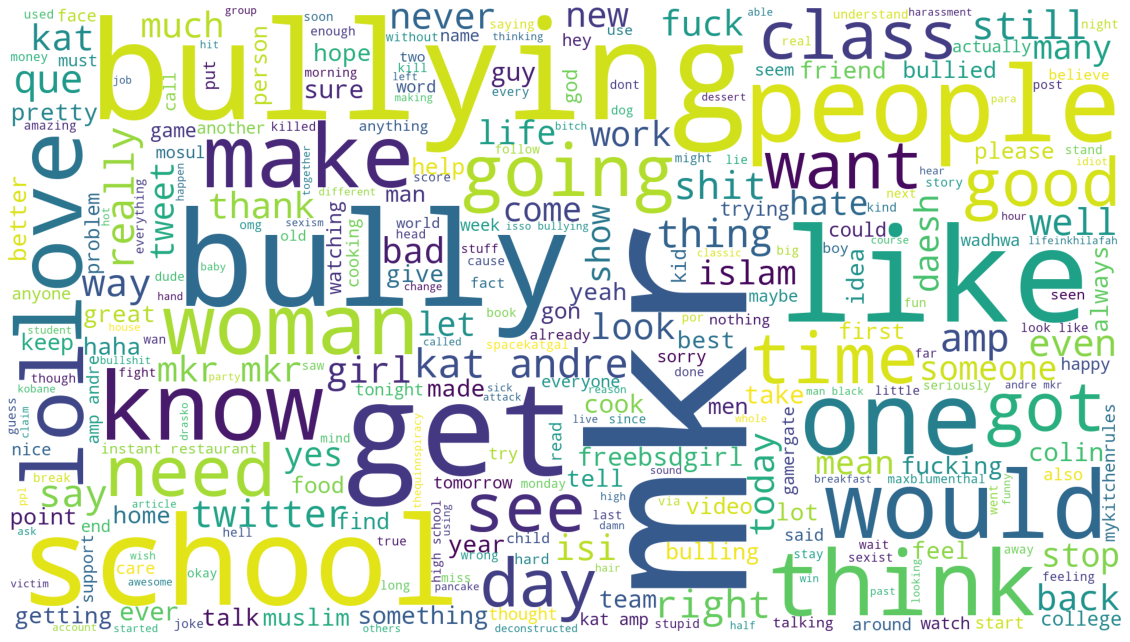

In [11]:
# wordcloud for not_cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'not_cyberbullying'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: All cyberbullying tweets
----

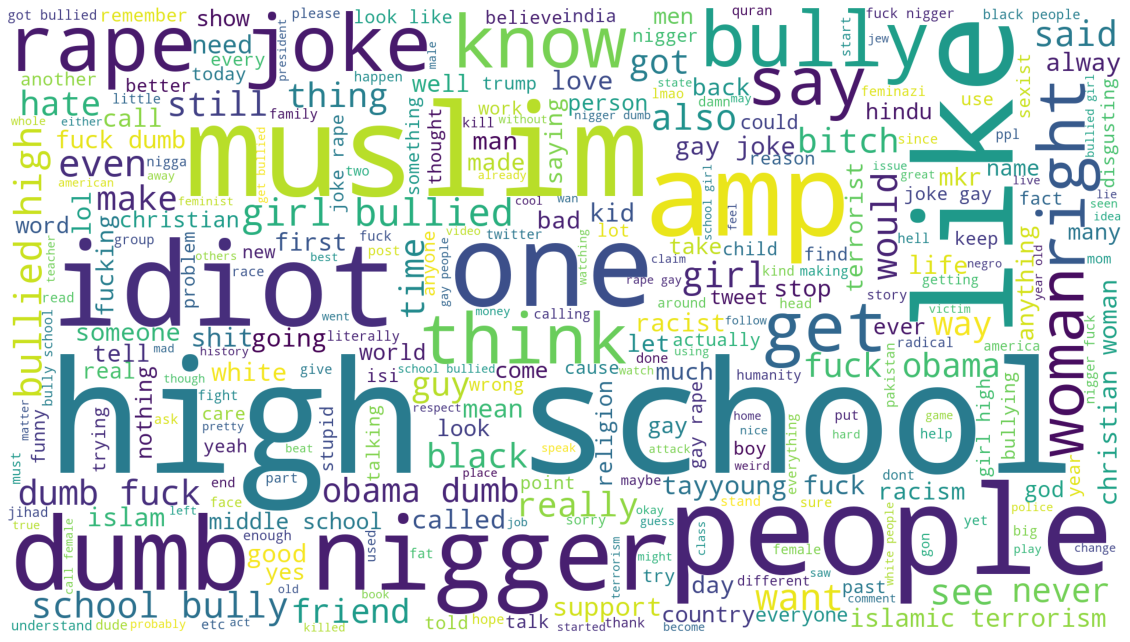

In [12]:
# wordcloud for all cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] != 'not_cyberbullying'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Age cyberbullying tweets
----

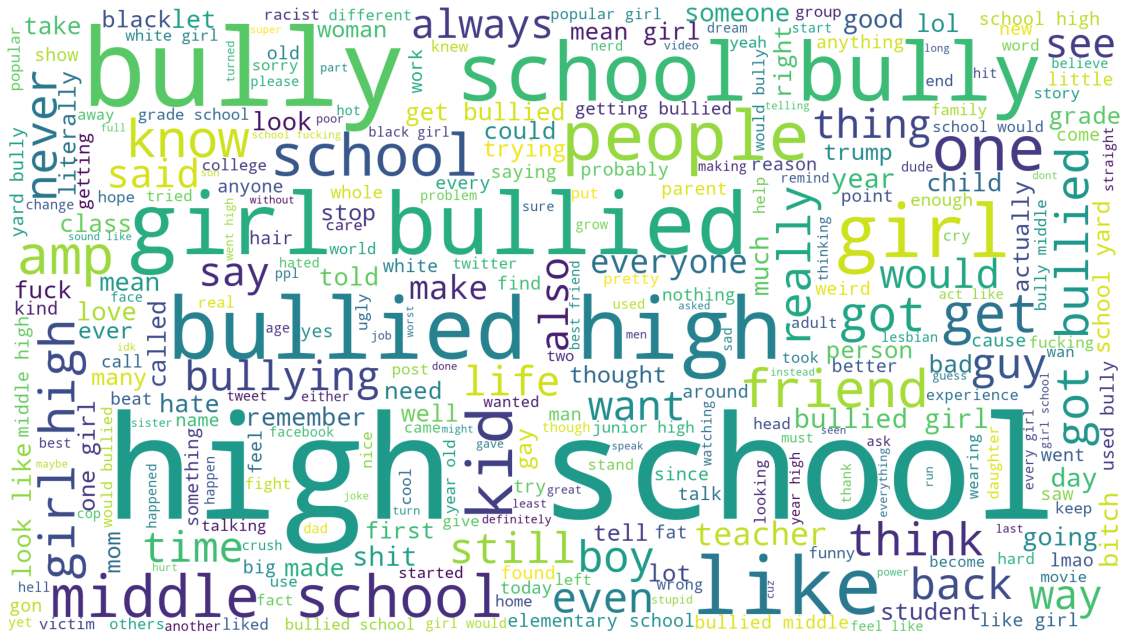

In [13]:
# wordcloud for age cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'age'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Ethnicity cyberbullying tweets
----

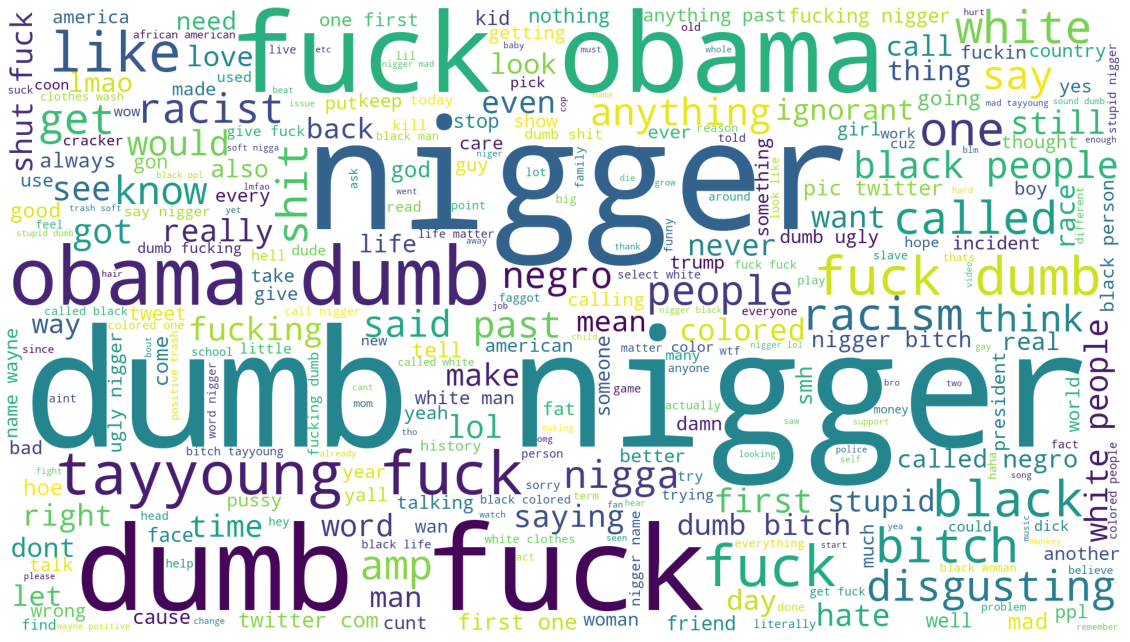

In [14]:
# wordcloud for ethnicity cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'ethnicity'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Gender cyberbullying tweets
----

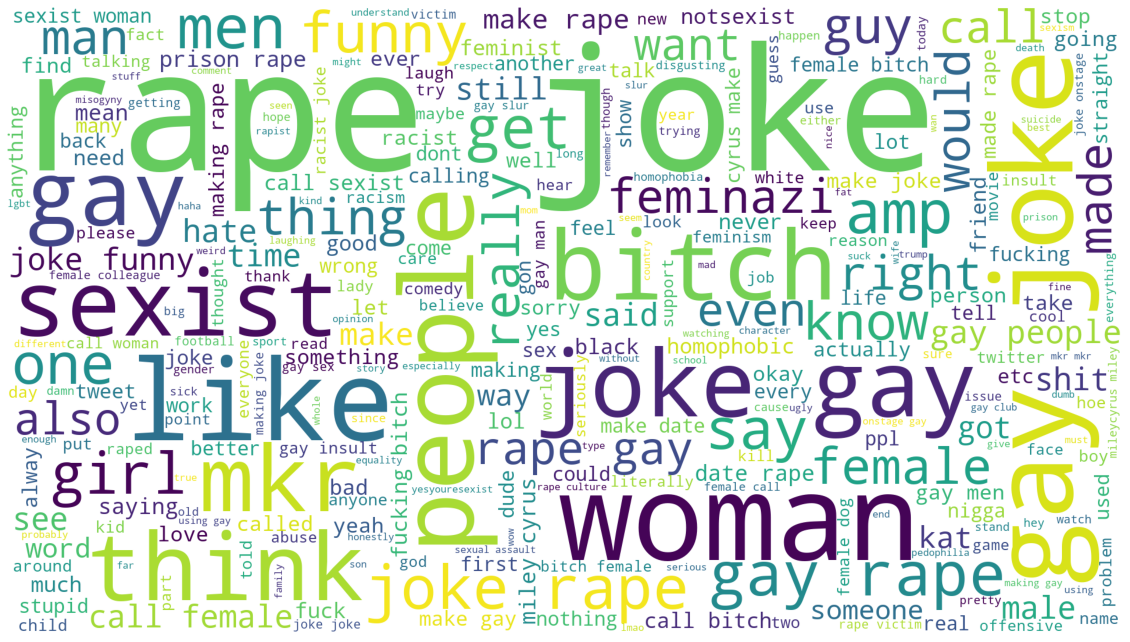

In [15]:
# wordcloud for gender cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'gender'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Religion cyberbullying tweets
----

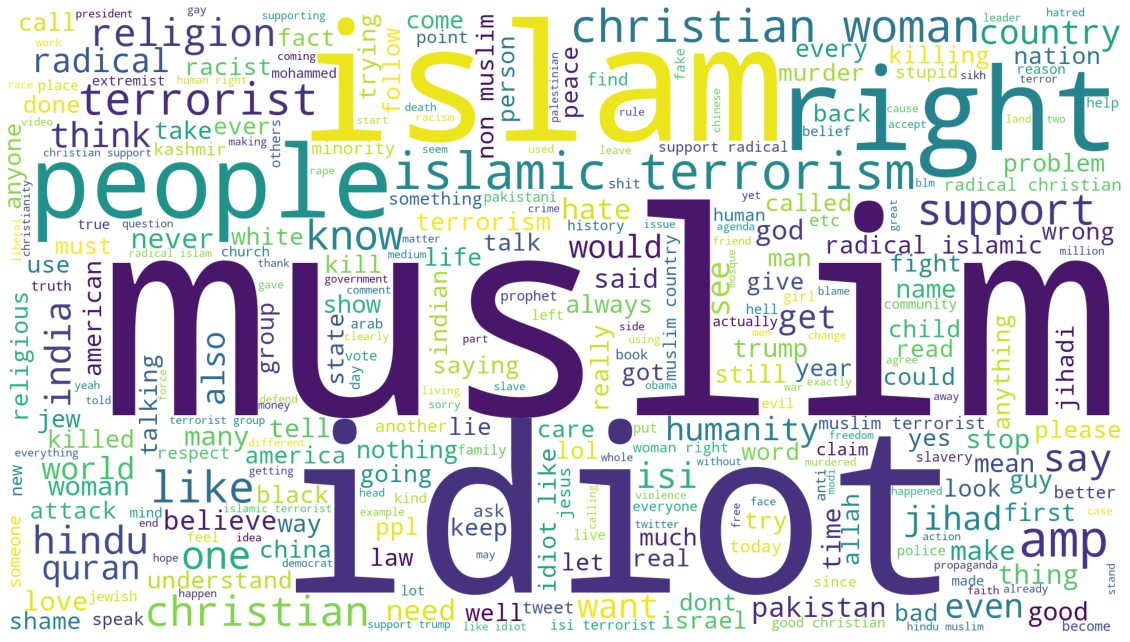

In [16]:
# wordcloud for religion cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'religion'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Other cyberbullying tweets
----

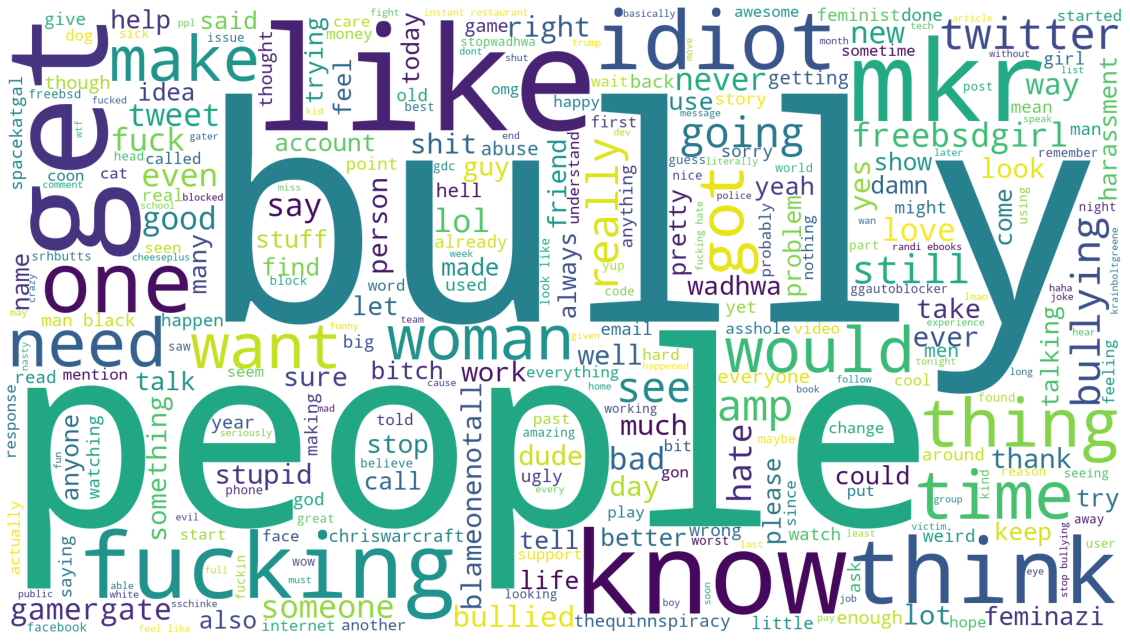

In [17]:
# wordcloud for other cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'other_cyberbullying'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()